# Required Assignment 5.1: Will the Customer Accept the Coupon?

### Context

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

### Overview

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

### Data

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under `$20`), coffee houses, carry out & take away, bar, and more expensive restaurants (`$20 - $50`).

### Deliverables

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





## Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

### 1. User attributes

- **Gender**: male, female
- **Age**: below 21, 21 to 25, 26 to 30, etc.
- **Marital Status**: single, married partner, unmarried partner, or widowed
- **Number of children**: 0, 1, or more than 1
- **Education**: high school, bachelors degree, associates degree, or graduate degree
- **Occupation**: architecture & engineering, business & financial, etc.
- **Annual income**: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
- **Number of times that he/she goes to a bar**: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- **Number of times that he/she buys takeaway food**: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
- **Number of times that he/she goes to a coffee house**: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
- **Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person**: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
- **Number of times that he/she goes to a bar**: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

### 2. Contextual attributes

- **Driving destination**: home, work, or no urgent destination
- **Location of user, coupon and destination**: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
- **Weather**: sunny, rainy, or snowy
- **Temperature**: 30F, 55F, or 80F
- **Time**: 10AM, 2PM, or 6PM
- **Passenger**: alone, partner, kid(s), or friend(s)


### 3. Coupon attributes

- **time before it expires**: 2 hours or one day

## General Imports

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Problems

Use the prompts below to get started with your data analysis.  


### 1. Read in the `coupons.csv` file.


In [82]:
data = pd.read_csv('data/coupons.csv')

In [98]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### 2. Investigate the dataset for missing or problematic data.

**2.1. Missing Data**

Let's start by outputting the count of missing data.

In [84]:
# Output the count of missing values
missing_values = data.isnull().sum().sort_values()
missing_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
toCoupon_GEQ25min           0
direction_same              0
Y                           0
direction_opp               0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


**Note**:

As we can see, the `car` column has a large number of missing values. Other columns (`Bar`, `RestaurantLessThan20`, `CarryAway`, `Restaurant20To50`, and `CoffeeHouse`) also have missing values; however, those values are not of the magnitude of that of the `car` column.

**2.2. Problematic Data**

Next, let's analyze the data to find out whether it contains problematic data. Let's start by displaying information about the data types of the columns.

In [10]:
# Output the types of the columns
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


Two things jump out right away: first, the **`"passenger"`** column is misspelled **`"passanger"`**. Second, the data type of the **`"age"`** column is a string; it should be an integer.

Let's start the fix by renaming the **`"passanger"`** column.

In [85]:
# Rename the misspelled `passanger` column
data.rename(columns = { 'passanger': 'passenger' }, inplace=True)
data.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


Next, before updating the type of the **`age`** column, let's output its values to see whether they can be easily cnverted to integers.

In [86]:
# Output the values of the `age` column
data['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

It's clear that some values (`"50plus"` and `"below21"`) contain strings. So fixing the `age` column will require two operations: removing all strings from the values and converting the data type to `integer`. Let's perform those two operations.

In [14]:
# Remove all strings from the `age` column and set its type to `integer`
data['age'] = data['age'].str.replace(r'\D+', '', regex=True).astype('int')
data.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

### 3. Decide what to do about your missing data -- drop, replace, other...

Since the total missing values for the `"car"`column is very high, I've decided not to drop all columns 
with missing data. Instead, I'll fill them with `"N/A"` since all the missing values are of type string.

In [16]:
# Replace all missing values with 'N/A'
df = data.fillna(value = 'N/A')
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,0


### 4. What proportion of the total observations chose to accept the coupon?



In [96]:
# Compute the acceptace percentage of all coupons
acceptance_percentage = df[['Y']].value_counts(normalize=True)
acceptance_percentage

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

Of the entire population, **57%** accepted the coupons and **43%** declined them. The histogram below shows a visualization of those percentages.

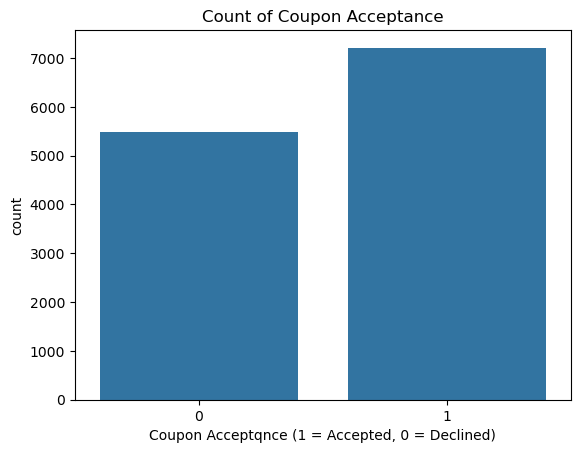

In [87]:
# Visuaize the acceptance percentage of the coupons
sns.countplot(df, x = 'Y')
plt.title('Count of Coupon Acceptance')
plt.xlabel('Coupon Acceptqnce (1 = Accepted, 0 = Declined)')
plt.savefig('images/total_coupon_acceptance.png')

### 5. Use a bar plot to visualize the `coupon` column.

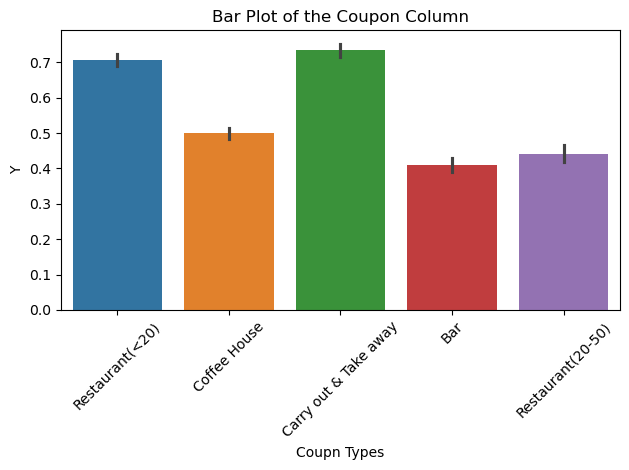

In [89]:
# Visualize the `coupon` column using a bar plot
sns.barplot(df, x = 'coupon', y = 'Y', hue = 'coupon')
plt.title('Bar Plot of the Coupon Column')
plt.xlabel('Coupn Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupons.png')
plt.show()

### 6. Use a histogram to visualize the temperature column.

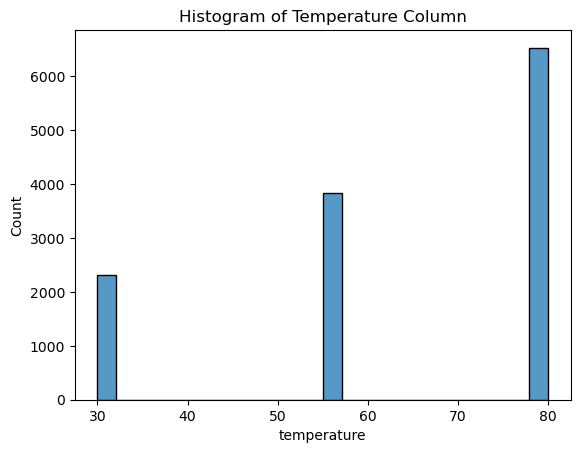

In [45]:
# Draw a histogram of the `temperature` column
sns.histplot(data = df, x = 'temperature')
plt.title('Histogram of Temperature Column')
plt.savefig('images/temperature.png')
plt.show()

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
# Create a bar coupon dataframe
bar_df = df.query('coupon == "Bar"')
bar_df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


#### 2. What proportion of bar coupons were accepted?


In [54]:
# Percentage of bar coupons that were accepted
bar_coupon_acceptance = bar_df[['Y']].value_counts(normalize=True)
bar_coupon_acceptance

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

**41%** of bar coupons were accepted and **59%** were declined, as visualized in the plot below.

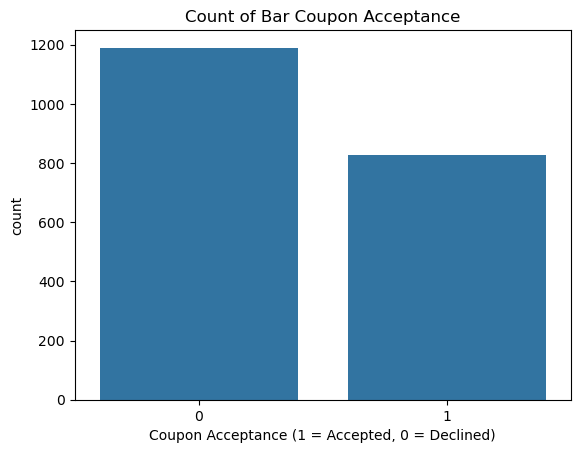

In [90]:
# Visualize the acceptance percentage of bar coupons
sns.countplot(bar_df, x = 'Y')
plt.title('Count of Bar Coupon Acceptance')
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Declined)')
plt.savefig('images/bar_coupon_acceptance.png')
plt.show()

#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


**3.1. Scenario 1: Went to a bar 3 or fewer times a month**

First, let's compute the acceptance rate of drivers who fall in the above category

In [58]:
three_times_or_less = ['less1', '1-3']
bar_df_3times_or_less = bar_df.query('Bar in @three_times_or_less')

coupon_acceptance_3times_or_less = bar_df_3times_or_less[['Y']].value_counts(normalize=True)
coupon_acceptance_3times_or_less

Y
0    0.55614
1    0.44386
Name: proportion, dtype: float64

Among drivers who went to a bar 3 or fewer times a month, **44%** accepted the coupons and **56%** declined them. This can be visualized in the plot below.

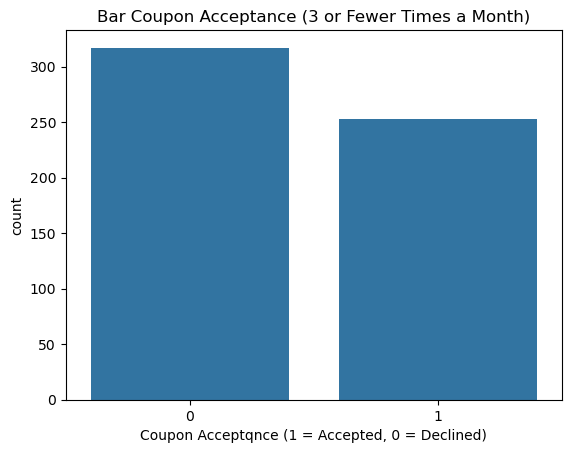

In [60]:
# Visualize the acceptance percentage among drivers who went to a bar 3 or fewer times a month
sns.countplot(bar_df_3times_or_less, x = 'Y')
plt.title('Bar Coupon Acceptance (3 or Fewer Times a Month)')
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Declined)')
plt.savefig('images/bar_coupon_3_or_fewer.png')
plt.show()

**3.2. Scenario 2: Went to a bar 4 times or more a month**

Next, let's compute the acceptance rate of drivers who went to a bar 4 times or more per month.

In [62]:
four_times_or_more = ['4-8', 'gt8']
bar_df_4times_or_more = bar_df.query('Bar in @four_times_or_more')

coupon_acceptance_4times_or_more = bar_df_4times_or_more[['Y']].value_counts(normalize=True)
coupon_acceptance_4times_or_more

Y
1    0.734694
0    0.265306
Name: proportion, dtype: float64

Among drivers who went to a bar 4 times or more a month, **73%** accepted the coupons and **27%** declined them. The acceptance ratio for this group is dramatically higher than that of drivers who went to a bar 3 or fewer times a month. The bar plot below shows the visualization of the acceptance percentage.

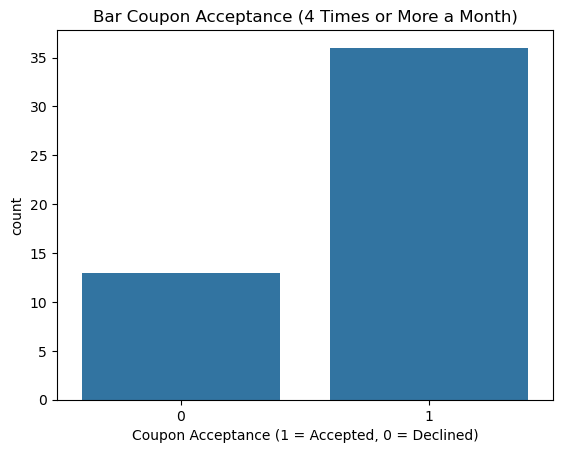

In [67]:
# Visualize the acceptance percentage among drivers who went to a bar 4 times or more a month
sns.countplot(bar_df_4times_or_more, x = 'Y')
plt.title('Bar Coupon Acceptance (4 Times or More a Month)')
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Declined)')
plt.savefig('images/bar_coupon_4_or_more.png')
plt.show()

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all the others.  Is there a difference?


Let's compute the acceptance percentage for that group of drivers.

In [69]:
bar_more_than_once = ['1-3', '4-8', 'gt8']
bar_goers_over_25 = bar_df.query('(Bar in @bar_more_than_once) & (age > 25)')

coupon_acceptance_over_25 = bar_goers_over_25[['Y']].value_counts(normalize=True)
coupon_acceptance_over_25

Y
1    0.7
0    0.3
Name: proportion, dtype: float64

Among drivers who went to a bar at least once a month and are over the age of 25, **70%** accepted the coupons and **30%** declined them. This is almost the same as the acceptance percentage of drivers who went to a bar 4 times or more a month, but still dramatically higher than that of drivers who went to a bar 3 times or less.

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [91]:
bar_frequency = ['1-3', '4-8', 'gt8']

non_farmers_no_kids_in_car = bar_df.query('(Bar in @bar_frequency) & (passenger != "Kid(s)") & (occupation != "Farming Fishing & Forestry")')
coupon_acceptance_non_farmers = non_farmers_no_kids_in_car[['Y']].value_counts(normalize=True)
coupon_acceptance_non_farmers

Y
1    0.729167
0    0.270833
Name: proportion, dtype: float64

Among drivers who went to a bar at least once a month, are non-farmers, and had no kids in the car, **73%** accepted the coupons and **27%** declined them. This is almost the same as the acceptance percentage of drivers who went to a bar 4 times or more a month, but still dramatic dramatically higher than that of drivers who went to a bar 3 times or less.

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



**6.1: Scenario 1: Went to bars more than once a month, were not widowed, and had no kids in car**

In [92]:
bar_frequency_once_or_more = ['1-3', '4-8', 'gt8']
bar_goers_not_widowed_no_kids = bar_df.query('(Bar in @bar_frequency_once_or_more) & (passenger != "Kid(s)") & (maritalStatus != "Widowed")')

coupon_acceptance_not_widowed = bar_goers_not_widowed_no_kids[['Y']].value_counts(normalize=True)
coupon_acceptance_not_widowed

Y
1    0.729167
0    0.270833
Name: proportion, dtype: float64

**6.2: Scenario 2: Went to bars more than once a month and are under the age of 30**

In [94]:
bar_frequency_at_least_once = ['1-3', '4-8', 'gt8']

bar_goers_under_30 = bar_df.query('(Bar in @bar_frequency_at_least_once) & (age < 30)')

coupon_acceptance_under_30 = bar_goers_under_30[['Y']].value_counts(normalize=True)
coupon_acceptance_under_30


Y
1    0.810811
0    0.189189
Name: proportion, dtype: float64

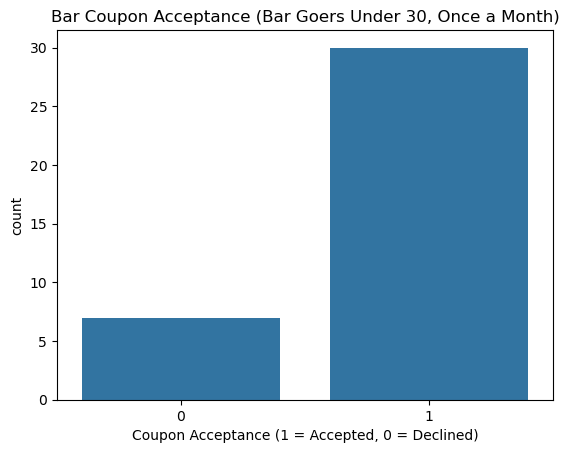

In [95]:
# Visualize the acceptance percentage among bar goers who are under the age of 30
sns.countplot(bar_goers_under_30, x = 'Y')
plt.title('Bar Coupon Acceptance (Bar Goers Under 30, Once a Month)')
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Declined)')
plt.savefig('images/bar_coupon_under_30_once.png')
plt.show()

**6.3: Scenario 3: Went to cheap restaurants 4 times or more and income is less than $50K**

In [78]:
restaurant_frequency = ['4-8', 'gt8']
less_than_50K = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999']

restaurant_goers = bar_df.query('(RestaurantLessThan20 in @restaurant_frequency) & (income in @less_than_50K)')

coupon_acceptance_restaurant_goers = restaurant_goers[['Y']].value_counts(normalize=True)
coupon_acceptance_restaurant_goers


Y
1    0.555556
0    0.444444
Name: proportion, dtype: float64

Of the 3 groups mentioned above, two obsevations stand out:
- The acceptance rate for those who went to bars more than once a month and are under the age of 30 is extremely high (**81%**). In fact, it is highest of any acceptance percentage computed so far.
- The acceptance rate of cheap restaurant goers is extremely low (**56%**)

### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, my hypotheses are as follows.

- Drivers who accepted the bar coupons are those who went to a bar more than once a month
- Among those drivers, the ones under the age of 30 have a very high acceptance rate
- Occupation, marital status, and whether there's a minor in the car don't affect the acceptance ratio much

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  